# Install

In [ ]:
# !pip install pandas
# !pip install matplotlib

# Formatting

In [23]:
# Constants
data_base_path = '../data'
output_base_path = '../output'
output_csv_path = f'{output_base_path}/csv'
output_image_path = f'{output_base_path}/images'

In [24]:
# read all files in the data folder data_base_path + '/*.json'

import os

all_file_path_list = []

for file in os.listdir(data_base_path):
    if file.endswith(".json"):
        all_file_path_list.append(os.path.join(data_base_path, file))

print(all_file_path_list)


['../data/air-force1.json', '../data/supreme-airforce1.json']


In [26]:
# Convert JSON to CSV

import pandas as pd
import json

def json_to_csv(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    # Extract relevant data into a structured format
    formatted_data = [
        {
            "date": entry["date_created"],
            "상품": data['name'],
            "카테고리": data['category']['name'],
            "발매가": data['original_price'],
            "브랜드": data['brand']['name'],
            "리셀가": entry["price"]
        }
        for entry in data['data']
    ]

    # Convert to DataFrame
    df = pd.DataFrame(formatted_data)

    # Save as CSV
    output_path = output_csv_path + '/' + file_path.split('/')[-1].replace('.json', '.csv')
    df.to_csv(output_path, index=False, encoding='utf-8-sig')

    return output_path

In [27]:
# convert all files

output_csv_path_list = []

for file_path in all_file_path_list:
    output_csv_path_list.append(json_to_csv(file_path))

print(output_csv_path_list)

['../output/csv/air-force1.csv', '../output/csv/supreme-airforce1.csv']


# Visualization

## Setting

In [60]:
# setting matplotlib

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='Noto Sans KR')

['DejaVu Serif',
 'STIXSizeTwoSym',
 'cmb10',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'cmtt10',
 'cmsy10',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'cmss10',
 'STIXGeneral',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'STIXGeneral',
 'cmex10',
 'STIXSizeFiveSym',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'DejaVu Sans',
 'cmr10',
 'DejaVu Serif Display',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXNonUnicode',
 'cmmi10',
 'DejaVu Serif',
 'STIXIntegralsD',
 'Liberation Mono for Powerline',
 'STIXNonUnicode',
 'Verdana',
 'Fira Mono for Powerline',
 'Noto Sans KR',
 'PT Mono',
 'Ubuntu Mono derivative Powerline',
 'Kohinoor Gujarati',
 'Trebuchet MS',
 'Devanagari MT',
 '.SF NS Rounded',
 'ProFont for Powerline',
 'Geneva',
 'Muna',
 'Verdana',
 'Noto Sans Tifinagh',
 'Noto 

In [61]:
# Plot time series data
# save at output_image_path

def plot_time_resell_price(file_path):
    df = pd.read_csv(file_path)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df['리셀가'], label='리셀가')
    plt.plot(df['date'], df['발매가'], label='발매가')
    plt.title(f'{df["상품"][0]}')
    plt.xlabel('날짜')
    plt.ylabel('가격')
    plt.xticks(df['date'][::100], rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()

    # save as image
    output_image_path = f'{output_base_path}/images'   
    output_path = output_image_path + '/' + file_path.split('/')[-1].replace('.csv', '.png')
    plt.savefig(output_path)

    plt.show()

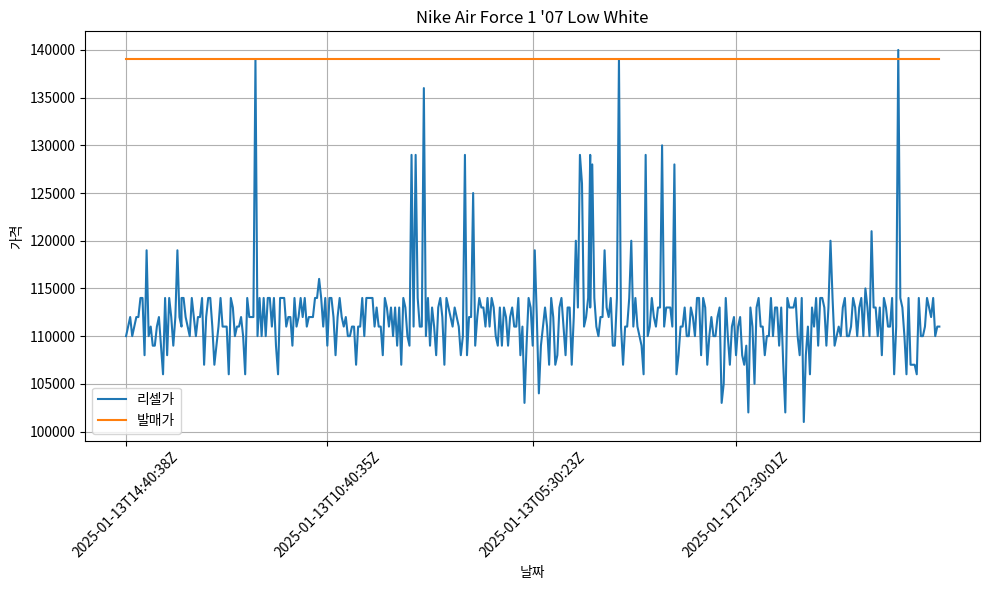

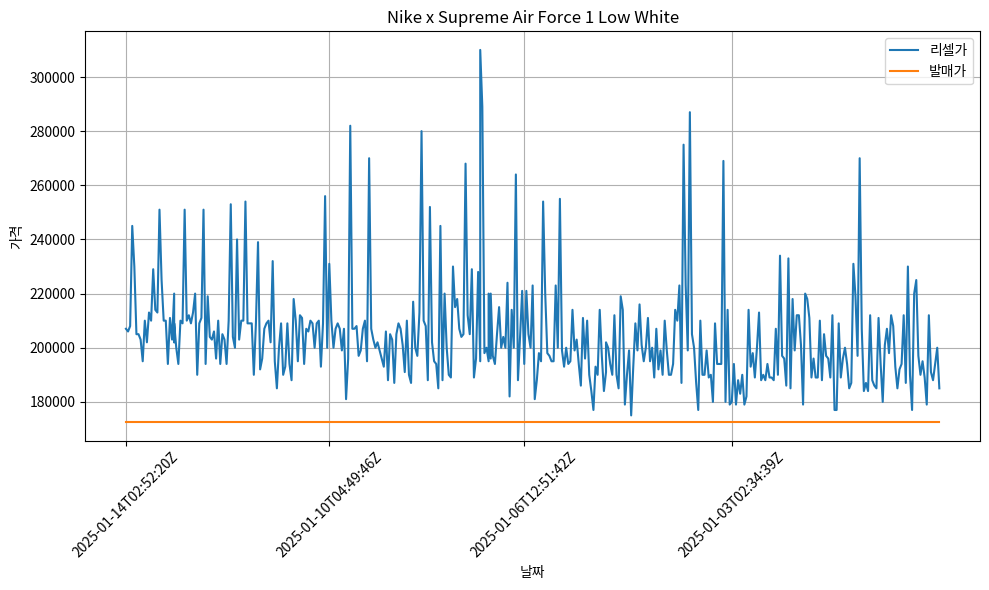

In [62]:
# visualize each csv file
# read all file in the output folder output_csv_path + '/*.csv': output_csv_path_list

for file_path in output_csv_path_list:
    plot_time_resell_price(file_path)